In [9]:
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


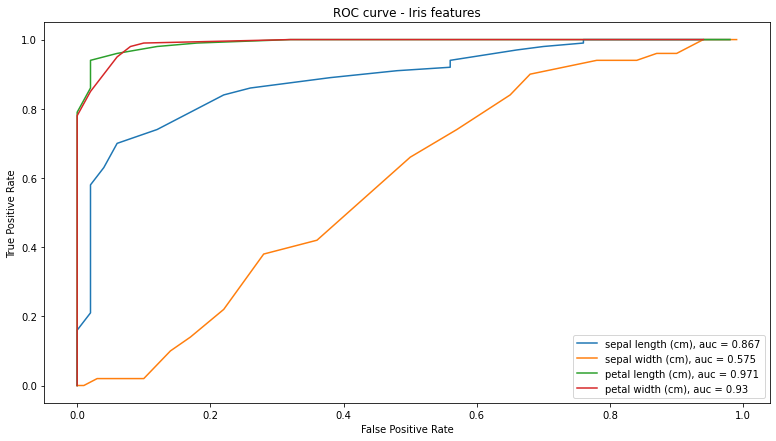

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import numpy as np
# loading dataset
data = load_iris()
X, y = data.data, data.target
y_ = y == 2
plt.figure(figsize=(13,7))
for col in range(X.shape[1]):
    tpr,fpr = [],[]
    for threshold in np.linspace(min(X[:,col]),max(X[:,col]),100):
        detP = X[:,col] < threshold
        tpr.append(sum(detP & y_)/sum(y_))# TP/P, aka recall
        fpr.append(sum(detP & (~y_))/sum((~y_)))# FP/N
        
    if auc(fpr,tpr) < .5:
        aux = tpr
        tpr = fpr
        fpr = aux
    plt.plot(fpr,tpr,label=data.feature_names[col] + ', auc = '\
                           + str(np.round(auc(fpr,tpr),decimals=3)))
plt.title('ROC curve - Iris features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()